# Content
1. Introduction
2. Dataset description
3. Weighted moving average algorithm
4. Weighted moving average example
5. Forecast evaluation
6. Conclusion
***

## 1. Introduction
A smoothing method reduces the effects of random variations that the deterministic components of a time series can have. With the help of smoothing methods we can also forecast new observations for a given time series. The algorithms that use smooting methods can forecast data for time series that have got or haven't got a trend. If an algorithm using smooting methods is designed to forecast an observation on a time series that has a trend, we should NOT use that algorithm to forecast a time series that does not have a trend and vice versa.
[Here](https://www.kaggle.com/andreicosma/introduction-in-time-series-moving-average) you cand find a beginner friendly tutorial to introduce you into time series and smoothing methods.
***

## 2. Dataset description
Our time series observations that will be used in this example are the numbers of daily female births in California in 1959 over a period of 365 days. We can see below how our time series looks like:

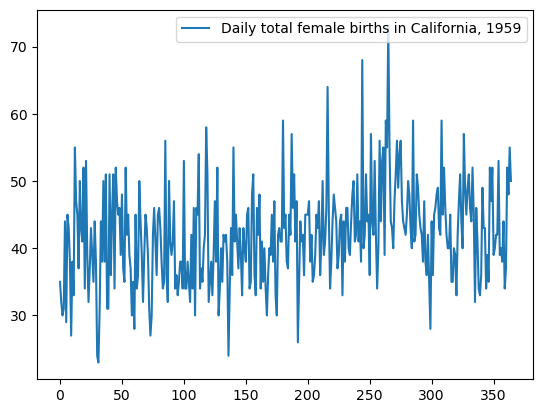

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_dataset = pd.read_csv("C://Users//DEEPIKA//Documents//Machine Learning//Moving Average//daily_total_female_births_in_cal.csv")
csv_dataset.plot()
plt.show()

As we can see, the data hasn't got a trend.

***
## 3. Weighted moving average algorithm
This algorithm helps us to forecast new observations based on a time series. This algorithm uses smoothing methods. The weightemoving average algorithm is used only on time series that DON'T have a trend. It is a more sophisticated version of the [moving average algorithm](https://www.kaggle.com/andreicosma/introduction-in-time-series-moving-average). The algorithm consists of calculating the weighted average of the last ,,n'' observations contained by the time series. The most recent observation will have the maximum weight and the one before it has the maximum weight - 1 and so on. We use the following formula: 
![formula](https://image.ibb.co/cTXwMc/wma.png)
We need to find the optimal number ,,n" of observations to be used in the forecast. We can find it by checking the mean square error of multiple ,,n'' observations. We should start at 3 observations and we can go up to half of the data set size + 1.

***
## 4. Weighted moving average example

In the following section, we are going to build an algorithm that finds the best ,,n'' observations to be used in the forecast by starting at 3 observations up to half of the data set + 1 observations and use that optimal ,,n'' to forecast the t + 1 observation. The algorithm calculates the mean square error for ,,n'' arguments, then for ,,n+1" and so on. After it has the MSE of all the ,,n'' variants, it picks the one with the minimum MSE.


In [2]:
optimal_n = None
best_mse = None
db = csv_dataset.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i:i+n]:
            result += data * weight
            divider += weight
            weight += 1
        obs = result / divider
        mean_for_n[i] = np.power(obs - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
print("Optimal n = %s" % optimal_n)

Best MSE = 47.17514578536712
Optimal n = 47


After the optimal ,,n'' observations were found, we can forecast the t+1 observation as following:

In [3]:
weight = 1
divider = 0
result = 0
for data in db[:, 0][len(db) - optimal_n: len(db)]:
    result += data * weight
    divider += weight
    weight += 1
next_observation =  result / divider
print("MA = %s" % next_observation)

MA = 43.54609929078014


***
## 5. Forecast evaluation
In this section we will evaluate the forecast for the best ,,n'' values with the real data and show the t+1 observation.

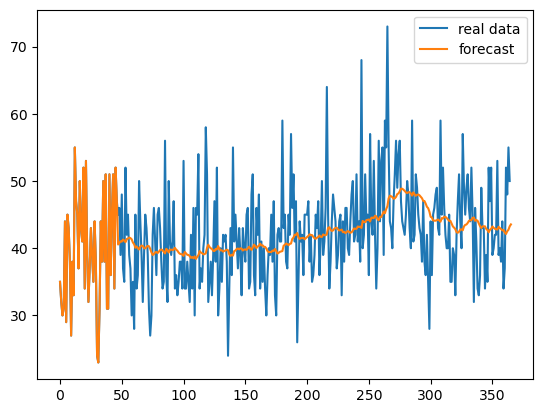

In [4]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i: i + optimal_n]:
            result += data * weight
            divider += weight
            weight += 1
        forecast[i+optimal_n] = result / divider
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()

***
## 6. Conclusion 
In this notebook it was shown how we can use algorithms based on smoothing methods to forecast data on a time series, as well as how the ,,Weighted Moving Average" algorithm calculates the weighted average of the last ,,n'' observations. Moreover, it was presented an implementation of how you can find the optimal ,,n'' observations. When dealing with time series, multiple algorithms should be tested to find out which of them gives the minimum MSE. The algorithm with the minimum MSE should be used for further forecasts on that time series.

I hope this notebook helped you. Don't forget to have fun testing multiple algorithms and enjoy the progress you make along the way!